# 랜덤포레스트

In [ ]:
# 랜덤포레스트(안정적)  :  결정트리가 많이 모인것 -> 결정트리보다 성능 좋음.  과대적합 방지. 
# XGboost

In [ ]:
# 복원추출해서 가져오는 방식 = 배깅
# 복원추출해서 데이터 1000개 가져온다. 두번째모델도 복원추출해서1000개. 세번째모델도 복원추출해서1000개. 네번째모델도 복원추출해서1000개.

In [2]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
# 데이터분할
X = iris.drop("species", axis = 1)
Y = iris["species"]

In [12]:
# 앙상블: 여러개의 머신러닝 모델들을 결합.
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, oob_score=True)        # n_estimators 지정안해줘도 기본값 100
                                            # oob_score => 선택받지못한 데이터로 평가하겠다
model.fit(X, Y)

RandomForestClassifier(oob_score=True)

In [13]:
model.oob_score_    # 100개의 나무가 각각 선택받지 못한 값들로 평가를 한 다음 그 값을 평균내어 모델을 평가

0.9533333333333334

In [14]:
model.estimators_            # 특성의 개수에 sqrt를 붙인거만큼 학습..   iris데이터의 특성4개니까  각각의 모델에 2개로 학습한것

[DecisionTreeClassifier(max_features='sqrt', random_state=456836976),
 DecisionTreeClassifier(max_features='sqrt', random_state=1843761241),
 DecisionTreeClassifier(max_features='sqrt', random_state=1268649384),
 DecisionTreeClassifier(max_features='sqrt', random_state=1602739220),
 DecisionTreeClassifier(max_features='sqrt', random_state=1812689997),
 DecisionTreeClassifier(max_features='sqrt', random_state=640990045),
 DecisionTreeClassifier(max_features='sqrt', random_state=2000905946),
 DecisionTreeClassifier(max_features='sqrt', random_state=132186000),
 DecisionTreeClassifier(max_features='sqrt', random_state=430497488),
 DecisionTreeClassifier(max_features='sqrt', random_state=1855028908),
 DecisionTreeClassifier(max_features='sqrt', random_state=1264625716),
 DecisionTreeClassifier(max_features='sqrt', random_state=433403661),
 DecisionTreeClassifier(max_features='sqrt', random_state=1324019831),
 DecisionTreeClassifier(max_features='sqrt', random_state=1884583921),
 DecisionTr

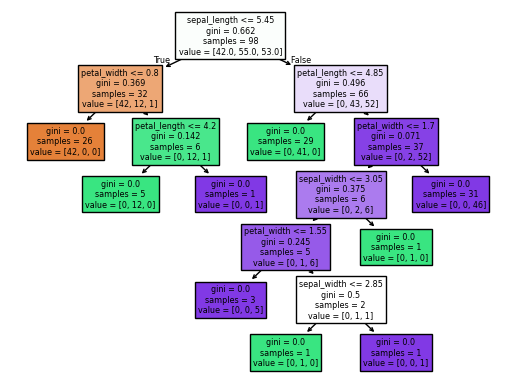

In [22]:
# 데이터가 균일할때 사용.

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plot_tree(model.estimators_[2], filled=True, feature_names=X.columns)
plt.show()